# ***Abalone age prediction***

In [1]:
import numpy as np                #import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
df = pd.read_csv('abalone.csv')        #import data
df.head()                                                   

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# ***univariate analysis***

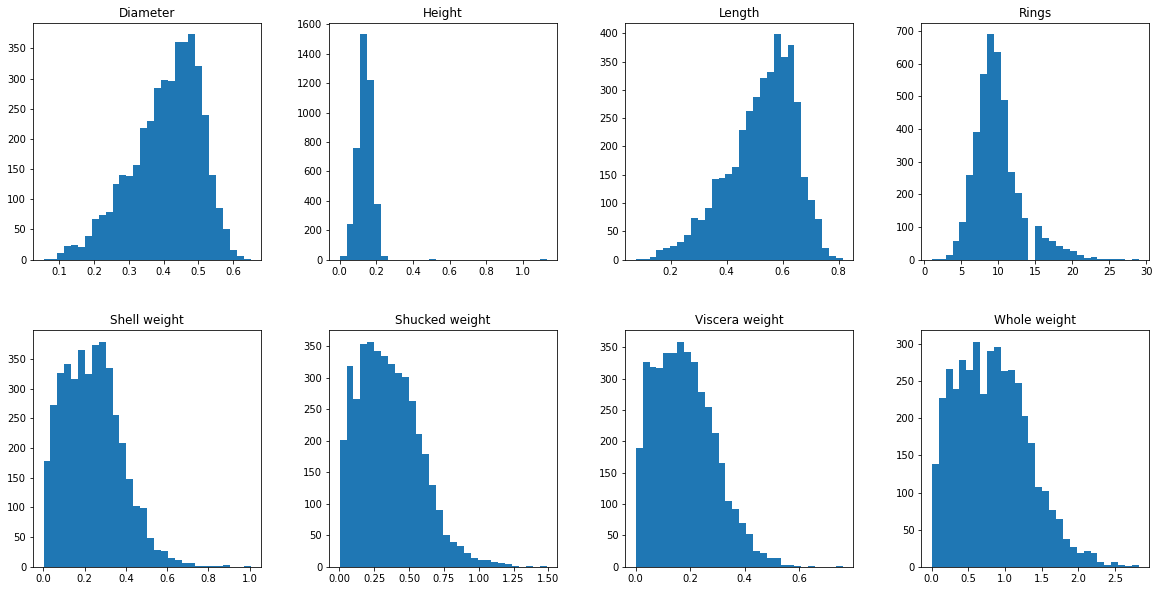

In [5]:
df.hist(figsize=(20,10), grid=False, layout=(2,4), bins=30)
plt.show()

# ***creating dummy variables***

In [6]:
Numerical = df.select_dtypes(include=[np.number]).columns
Categorical = df.select_dtypes(include=[np.object]).columns
skew_values = skew(df[Numerical], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(Numerical), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


The skewness in features are more than 0, it means that the weight of the data is more towards the right tail of the distribution. Specially Height and Age. For Normally distributed data the skewness should be about 0.

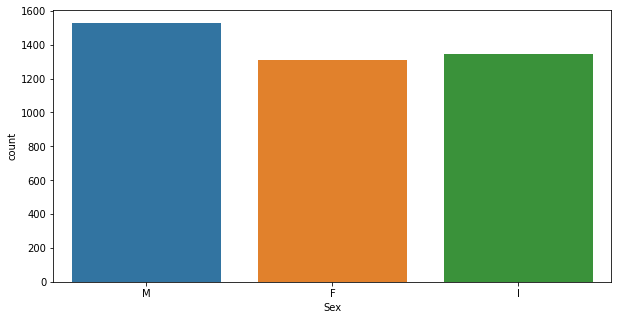

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(df['Sex'])
plt.show()

males are more 

# ***outlier detection***

In [8]:
df['Age'] = df['Rings']+1.5
df = df.drop('Rings', axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


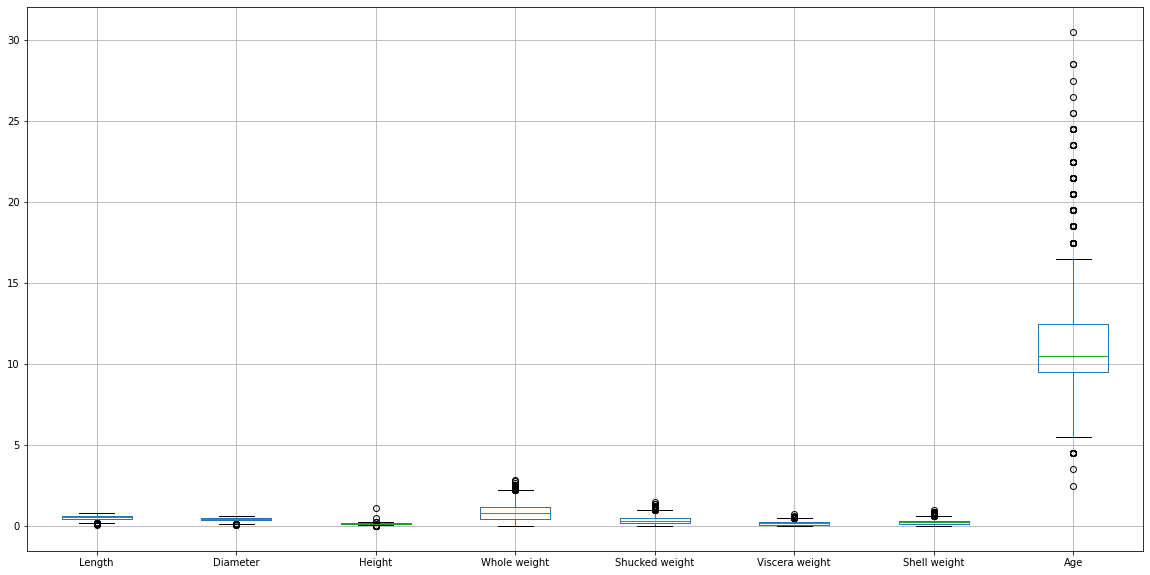

In [9]:
df.boxplot(figsize=(20,10))
plt.show()

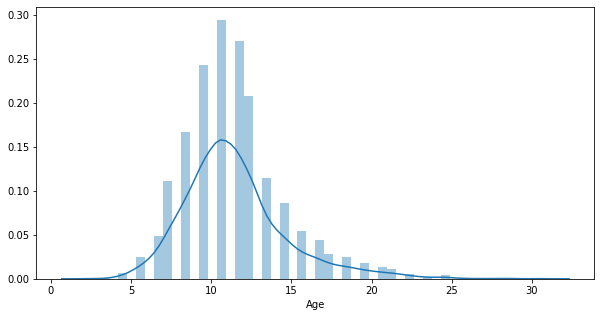

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'])
plt.show()

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


mean is greater than medain so right skewed

# ***bivariate analysis***

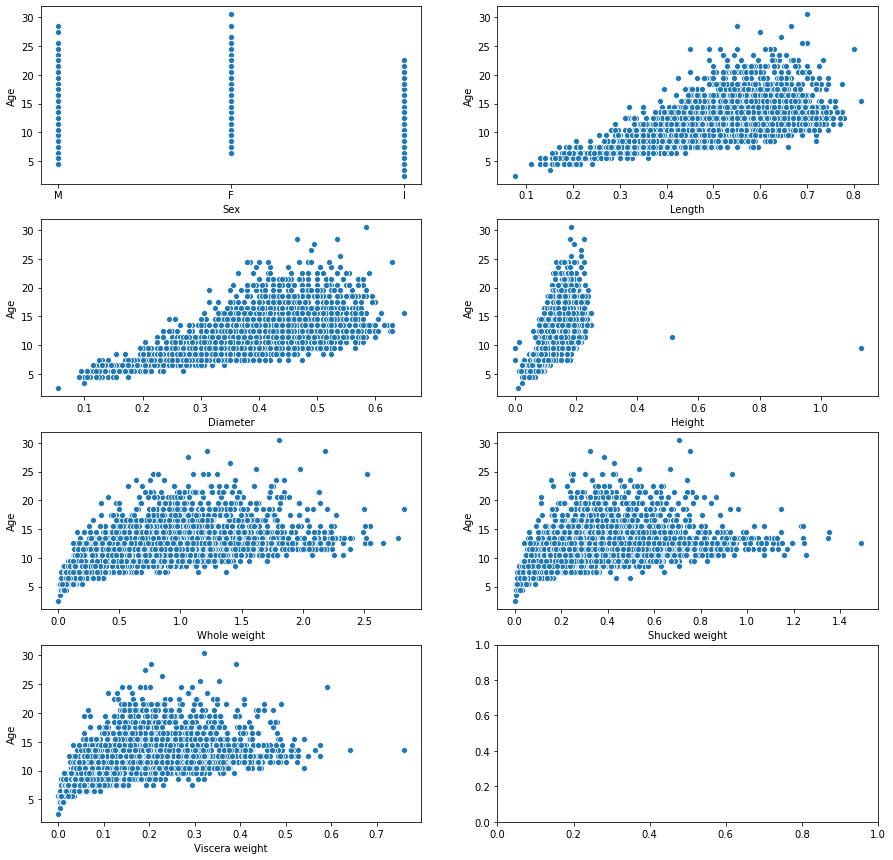

In [12]:
fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.flatten()

for i in range(len(df.columns)-2):
    sns.scatterplot(x=df.iloc[:,i], y=df['Age'], ax=axes[i])

plt.show()

***we can observe that there are liner relations with every feature and "Age" except for the Age and gender***

In [13]:
df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,12.629304,3.104256,6.5,10.5,11.5,13.5,30.5
I,1342.0,9.390462,2.511554,2.5,7.5,9.5,10.5,22.5
M,1528.0,12.205497,3.026349,4.5,10.5,11.5,13.5,28.5


In [14]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,1,0


Male : age majority lies in between 7.5 years to 19 years

Female: age majority lies in between 8 years to 19 years

Immature: age majority lies in between 6 years to < 10 years

# ***correlation matrix***

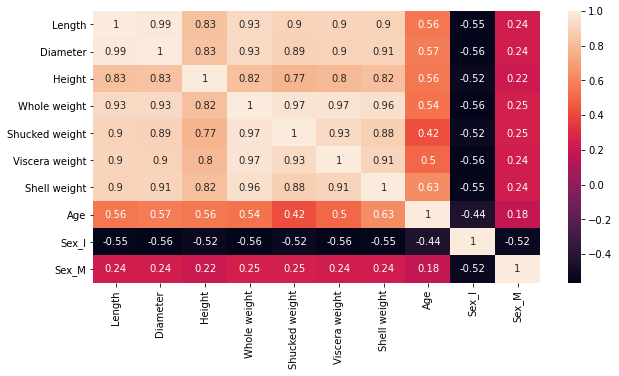

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

***no variabe transformation is needed for this as all are linearly distributed***

In [16]:
cols = list(df.columns)
cols

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Age',
 'Sex_I',
 'Sex_M']

Length


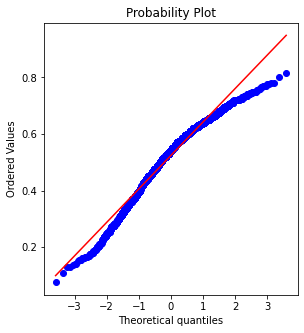

Diameter


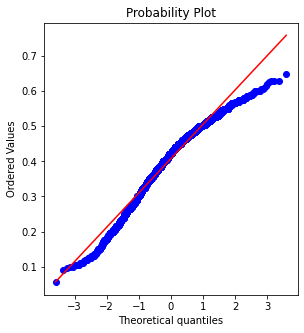

Height


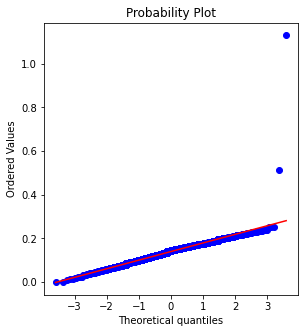

Whole weight


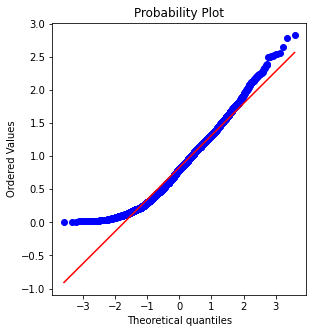

Shucked weight


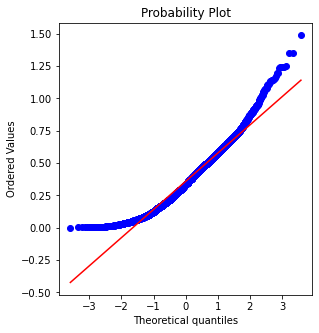

Viscera weight


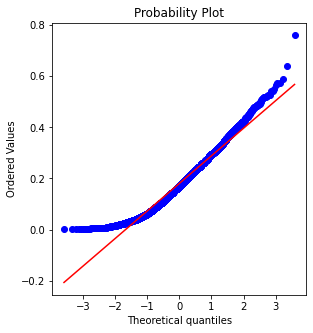

Shell weight


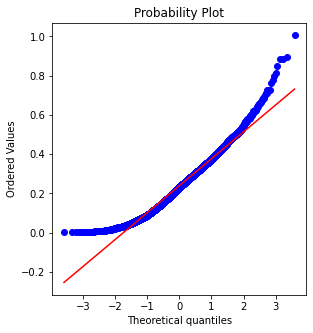

Age


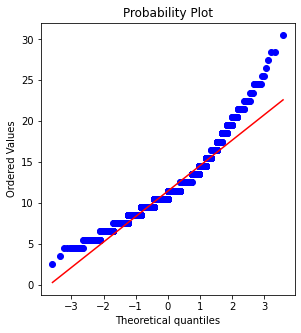

Sex_I


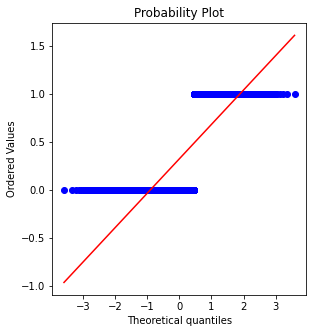

Sex_M


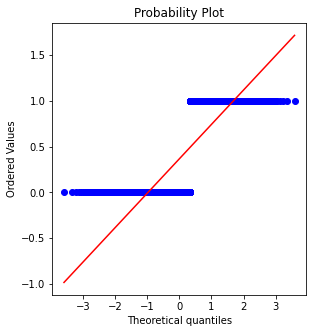

In [17]:
import scipy.stats as stat 
def probplt(df,col):
    for i in cols:
        plt.figure(figsize=(10,5))   
        df[i].hist()
        plt.subplot(1,2,2)
        stat.probplot(df[i],dist='norm',plot=plt)
        print(i)
        plt.show()
probplt(df,cols)

# ***predictions***

In [18]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,1,0


In [19]:
X = df.drop('Age', axis=1)
y = df['Age']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict

models = [   SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4)]
results = []
names = ['SVM','Random Forest','Gradient Boost','K-Nearest Neighbors']
for model,name in zip(models,names):
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    rmse = np.sqrt(mean_squared_error(y, cross_val_predict(model, X , y, cv=3)))
    results.append(rmse)
    names.append(name)
    msg = "%s: %f" % (name, rmse)
    print(msg)

SVM: 2.306551
Random Forest: 2.231294
Gradient Boost: 2.195300
K-Nearest Neighbors: 2.353608
